## Regression

En este problema vamos a intentar predecir el aumento de seguidores en twitch para los diferentes canales más seguidos del mundo.
  
Para ello contamos con el nombre del canal, el tiempo de visualización, el tiempo de stream, el pico de viewers, el promedio de viewers, el número de followers, el aumento de visualizaciones, si se trata de un canal asociado o no y el idioma. La variable a predecir es "Followers gained", que hace referencia al aumento de seguidores mencionado anteriormente.

### Realiza un estudio comparativo de los modelos de regresión lineal simple y regresión lineal múltiple (aplicando métodos de selección de variables).

Importamos las librerías

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

Cargamos el dataset

In [4]:
dataset = pd.read_csv("../data/twitchdata-update.csv")

In [5]:
dataset.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


Preprocesado de datos

In [6]:
dataset.shape

(1000, 11)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [8]:
dataset.isna().mean()

Channel                 0.0
Watch time(Minutes)     0.0
Stream time(minutes)    0.0
Peak viewers            0.0
Average viewers         0.0
Followers               0.0
Followers gained        0.0
Views gained            0.0
Partnered               0.0
Mature                  0.0
Language                0.0
dtype: float64

In [9]:
dataset.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


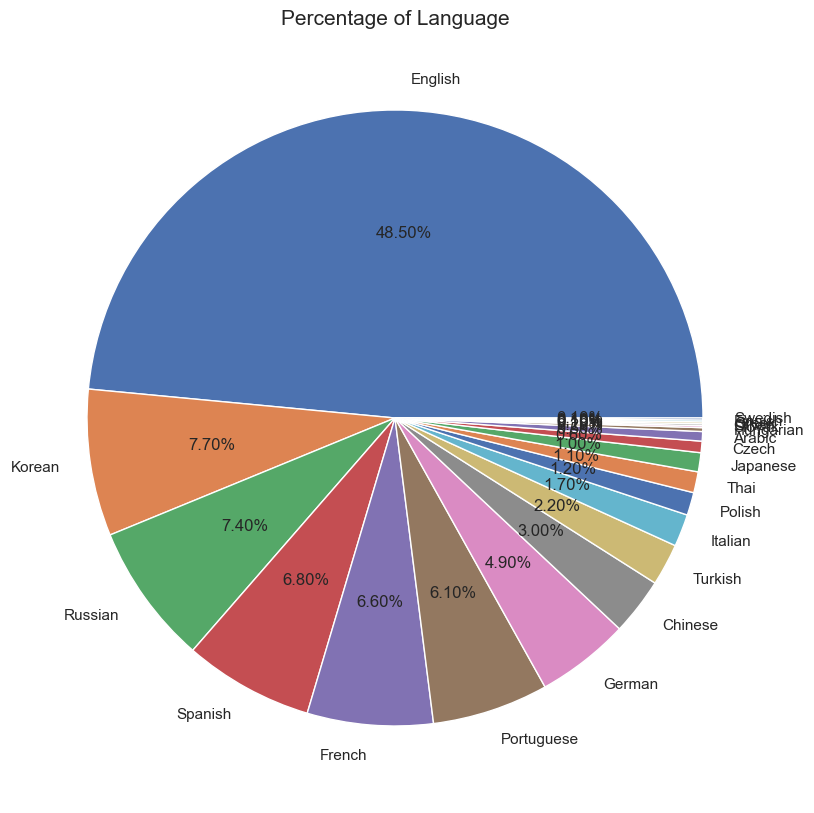

In [16]:
# Nos pintamos la distribución de la variable categórica
plt.figure(figsize=(10,10))
df1 = dataset['Language'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%')
plt.title('Percentage of Language', fontsize=15)
plt.show()

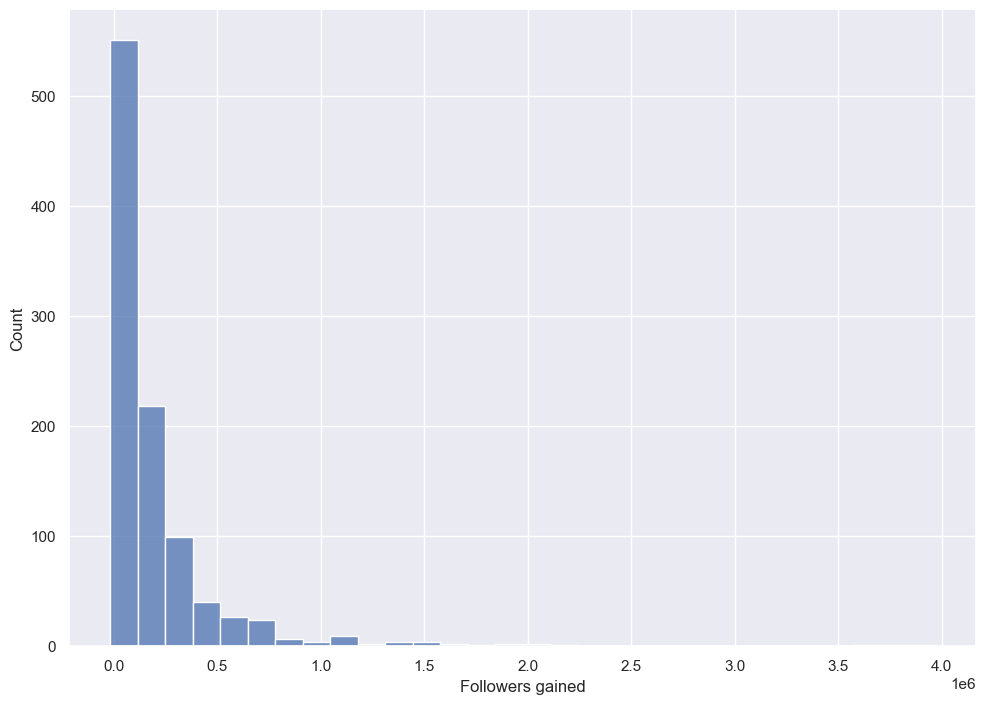

In [17]:
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

sns.histplot(dataset['Followers gained'], bins=30)
plt.show()

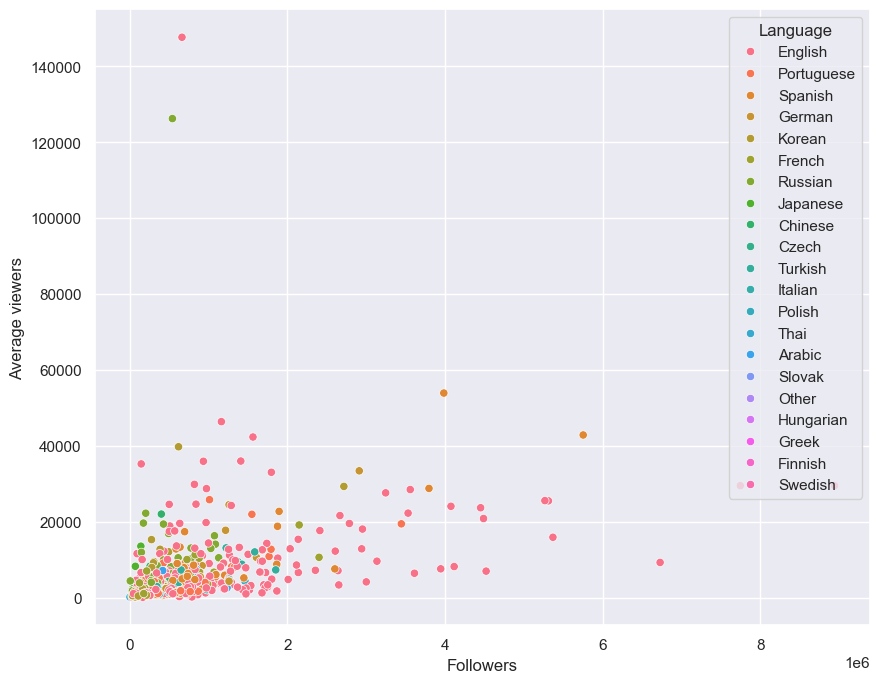

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=dataset.Followers , y=dataset['Average viewers'], hue=dataset.Language )
plt.show()

Vemos las correlaciones entre variables.

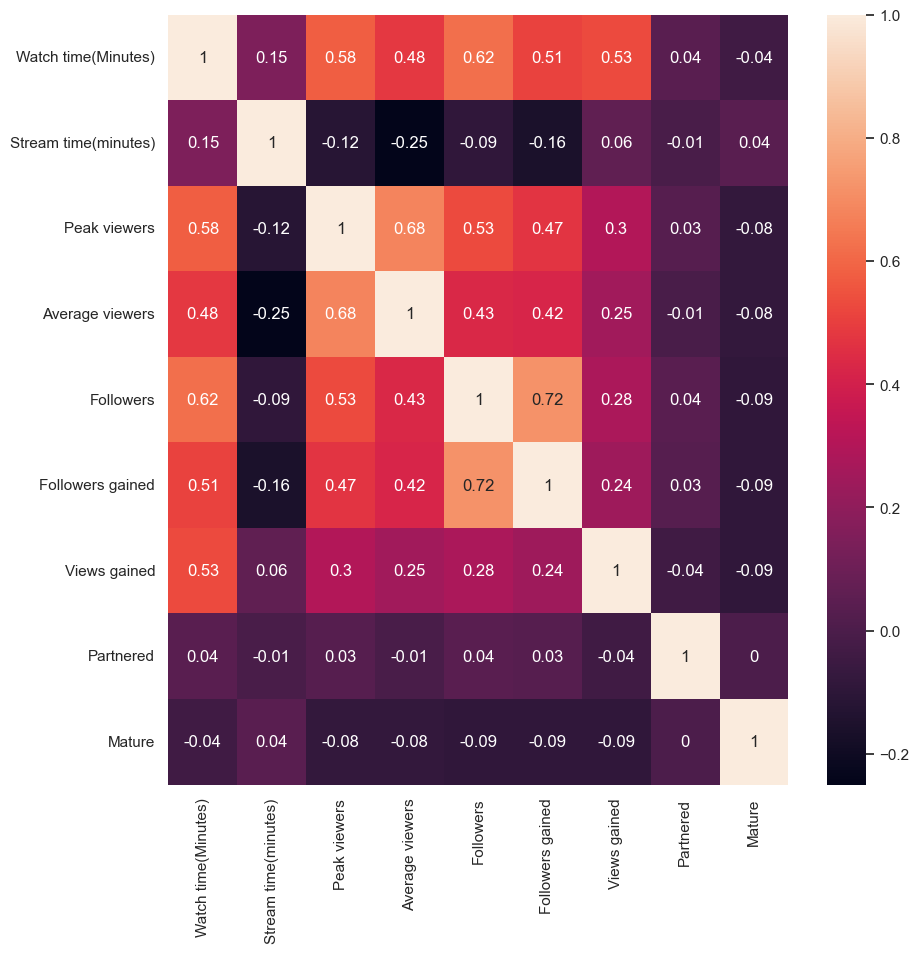

In [26]:
plt.figure(figsize=(10,10))
correlation_matrix = dataset.corr(numeric_only=True).round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [28]:
dataset.drop("Channel", axis = 1, inplace = True)

In [29]:
dataset = pd.get_dummies(dataset, drop_first = True)

In [30]:
dataset.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language_Chinese,...,Language_Korean,Language_Other,Language_Polish,Language_Portuguese,Language_Russian,Language_Slovak,Language_Spanish,Language_Swedish,Language_Thai,Language_Turkish
0,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,False,...,False,False,False,True,False,False,False,False,False,False
3,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## Vamos a ir modificando los hiperparámetros del arbol

In [32]:
dataset = pd.read_csv("../data/twitchdata-update.csv")

In [33]:
dataset.drop("Channel", axis = 1, inplace = True)

In [34]:
dataset = pd.get_dummies(dataset, drop_first = True)

In [35]:
X = dataset.drop("Followers gained", axis = 1)
Y = dataset['Followers gained']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 28)
(200, 28)
(800,)
(200,)


In [37]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Limitamos a 5 la profundidad del árbol

In [ ]:
regression = DecisionTreeRegressor(random_state = 0, 
                                   max_depth = 5)

In [39]:
regression.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [43]:
import math
# model evaluation for training set

y_train_predict = regression.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, y_train_predict))
mse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)


print("The model performance for Train set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = regression.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(y_test, y_test_predict))
mse = mean_squared_error(y_test, y_test_predict)
# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)


print("The model performance for Test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for Train set
--------------------------------------
RMSE is 149557.46787767814
MSE is 22367436197.98273
R2 score is 0.8304058672789094


The model performance for Test set
--------------------------------------
RMSE is 172493.27397044856
MSE is 29753929565.044224
R2 score is 0.38207374717010767


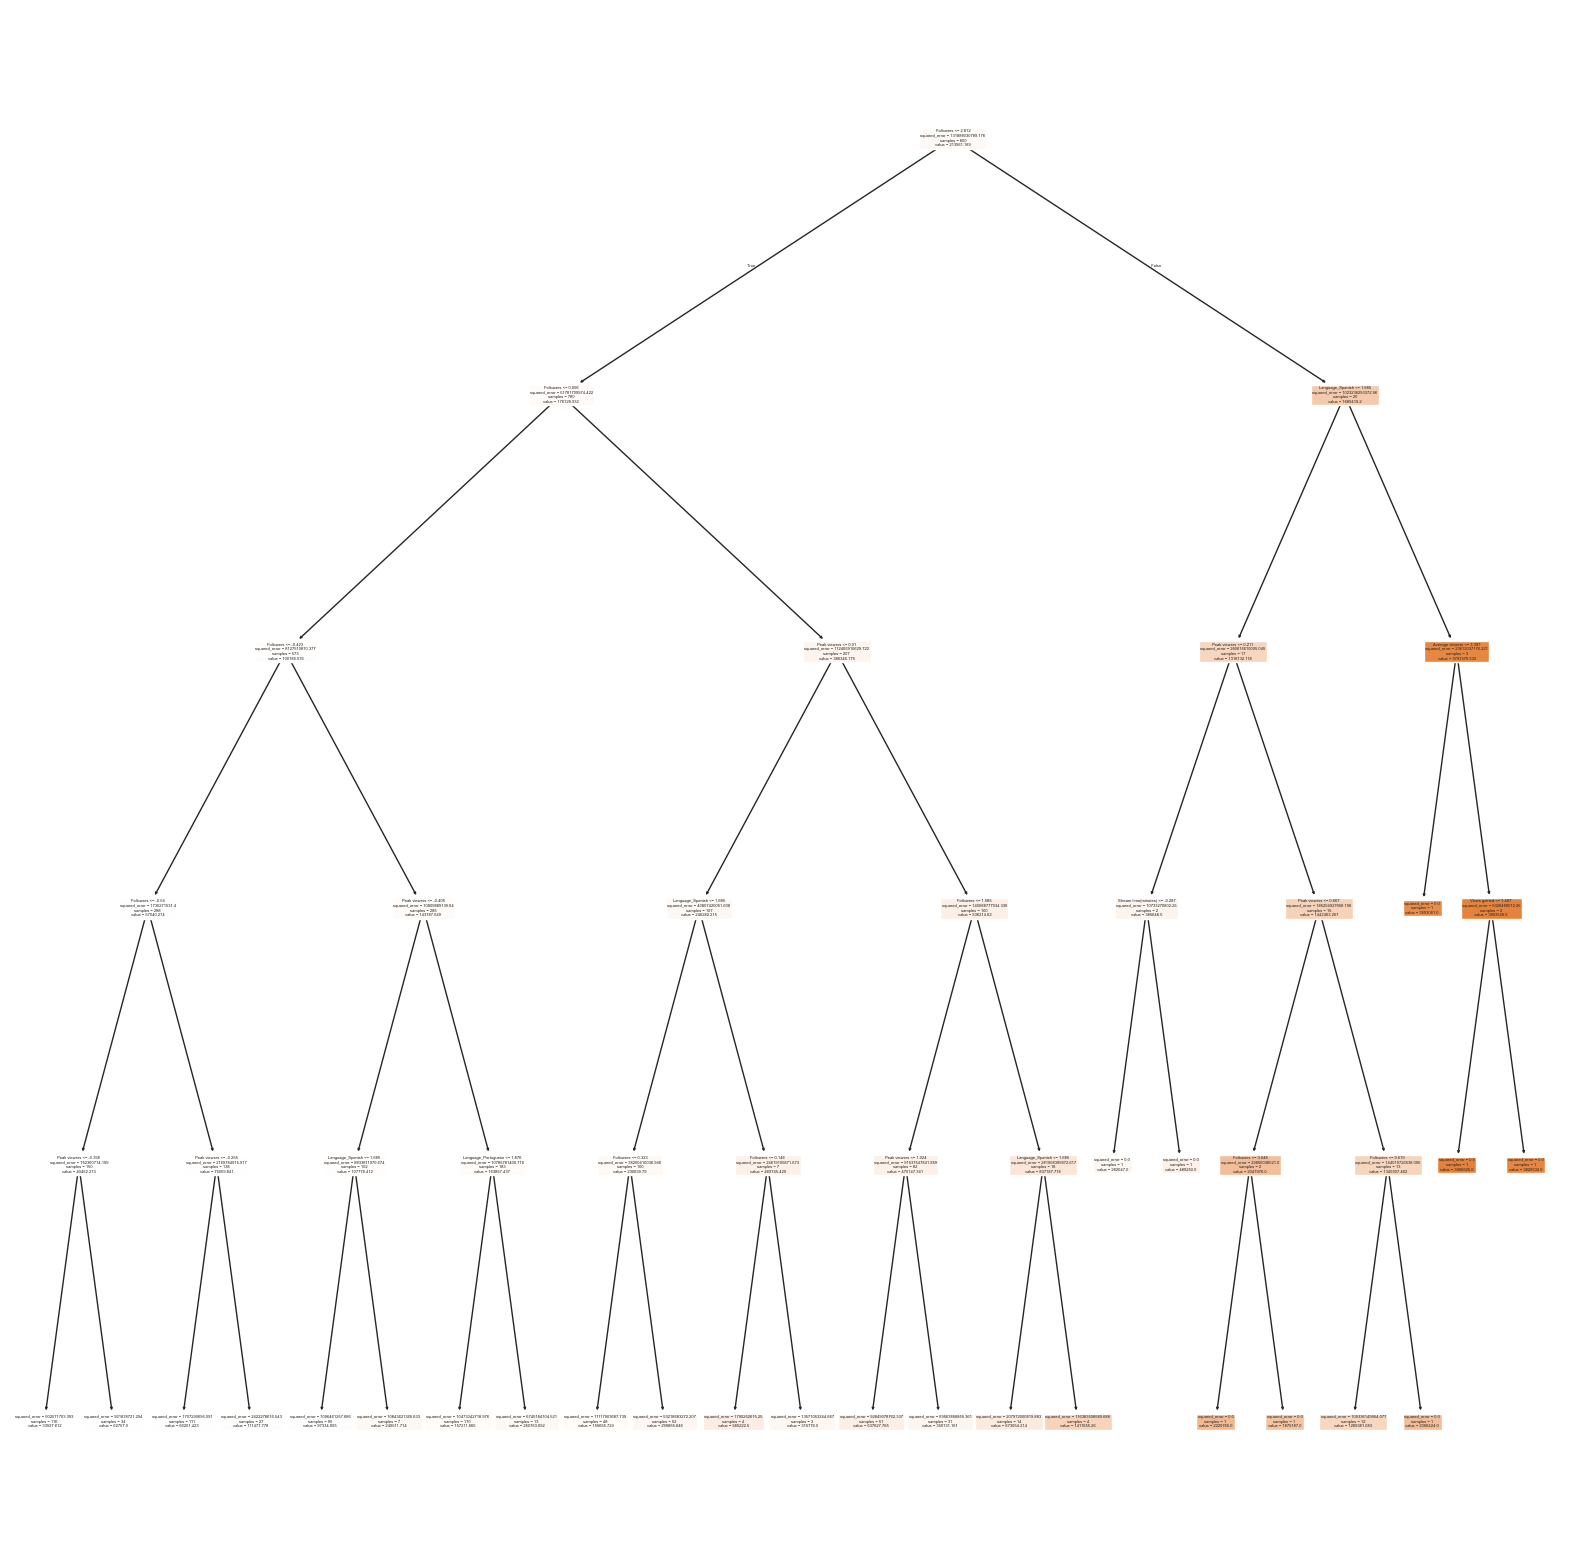

In [46]:
from sklearn import tree
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(regression, 
                   feature_names=X.columns,  
                   class_names=["SalePrice"],
                   filled=True)

### Probamos dándole un mínimo de muestras para que pueda haber una división.

In [47]:
#Probamos dándole un mínimo de muestras para que pueda haber una división.
regression = DecisionTreeRegressor(random_state = 0, 
                                   min_samples_split = 20)

In [48]:
regression.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [50]:
# model evaluation for training set

y_train_predict = regression.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, y_train_predict))
mse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = regression.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(y_test, y_test_predict))
mse = mean_squared_error(y_test, y_test_predict)
# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 148896.1084777999
MSE is 22170051119.83275
R2 score is 0.83190247828272


The model performance for testing set
--------------------------------------
RMSE is 216094.76578847656
MSE is 46696947801.176544
R2 score is 0.03020305569069759


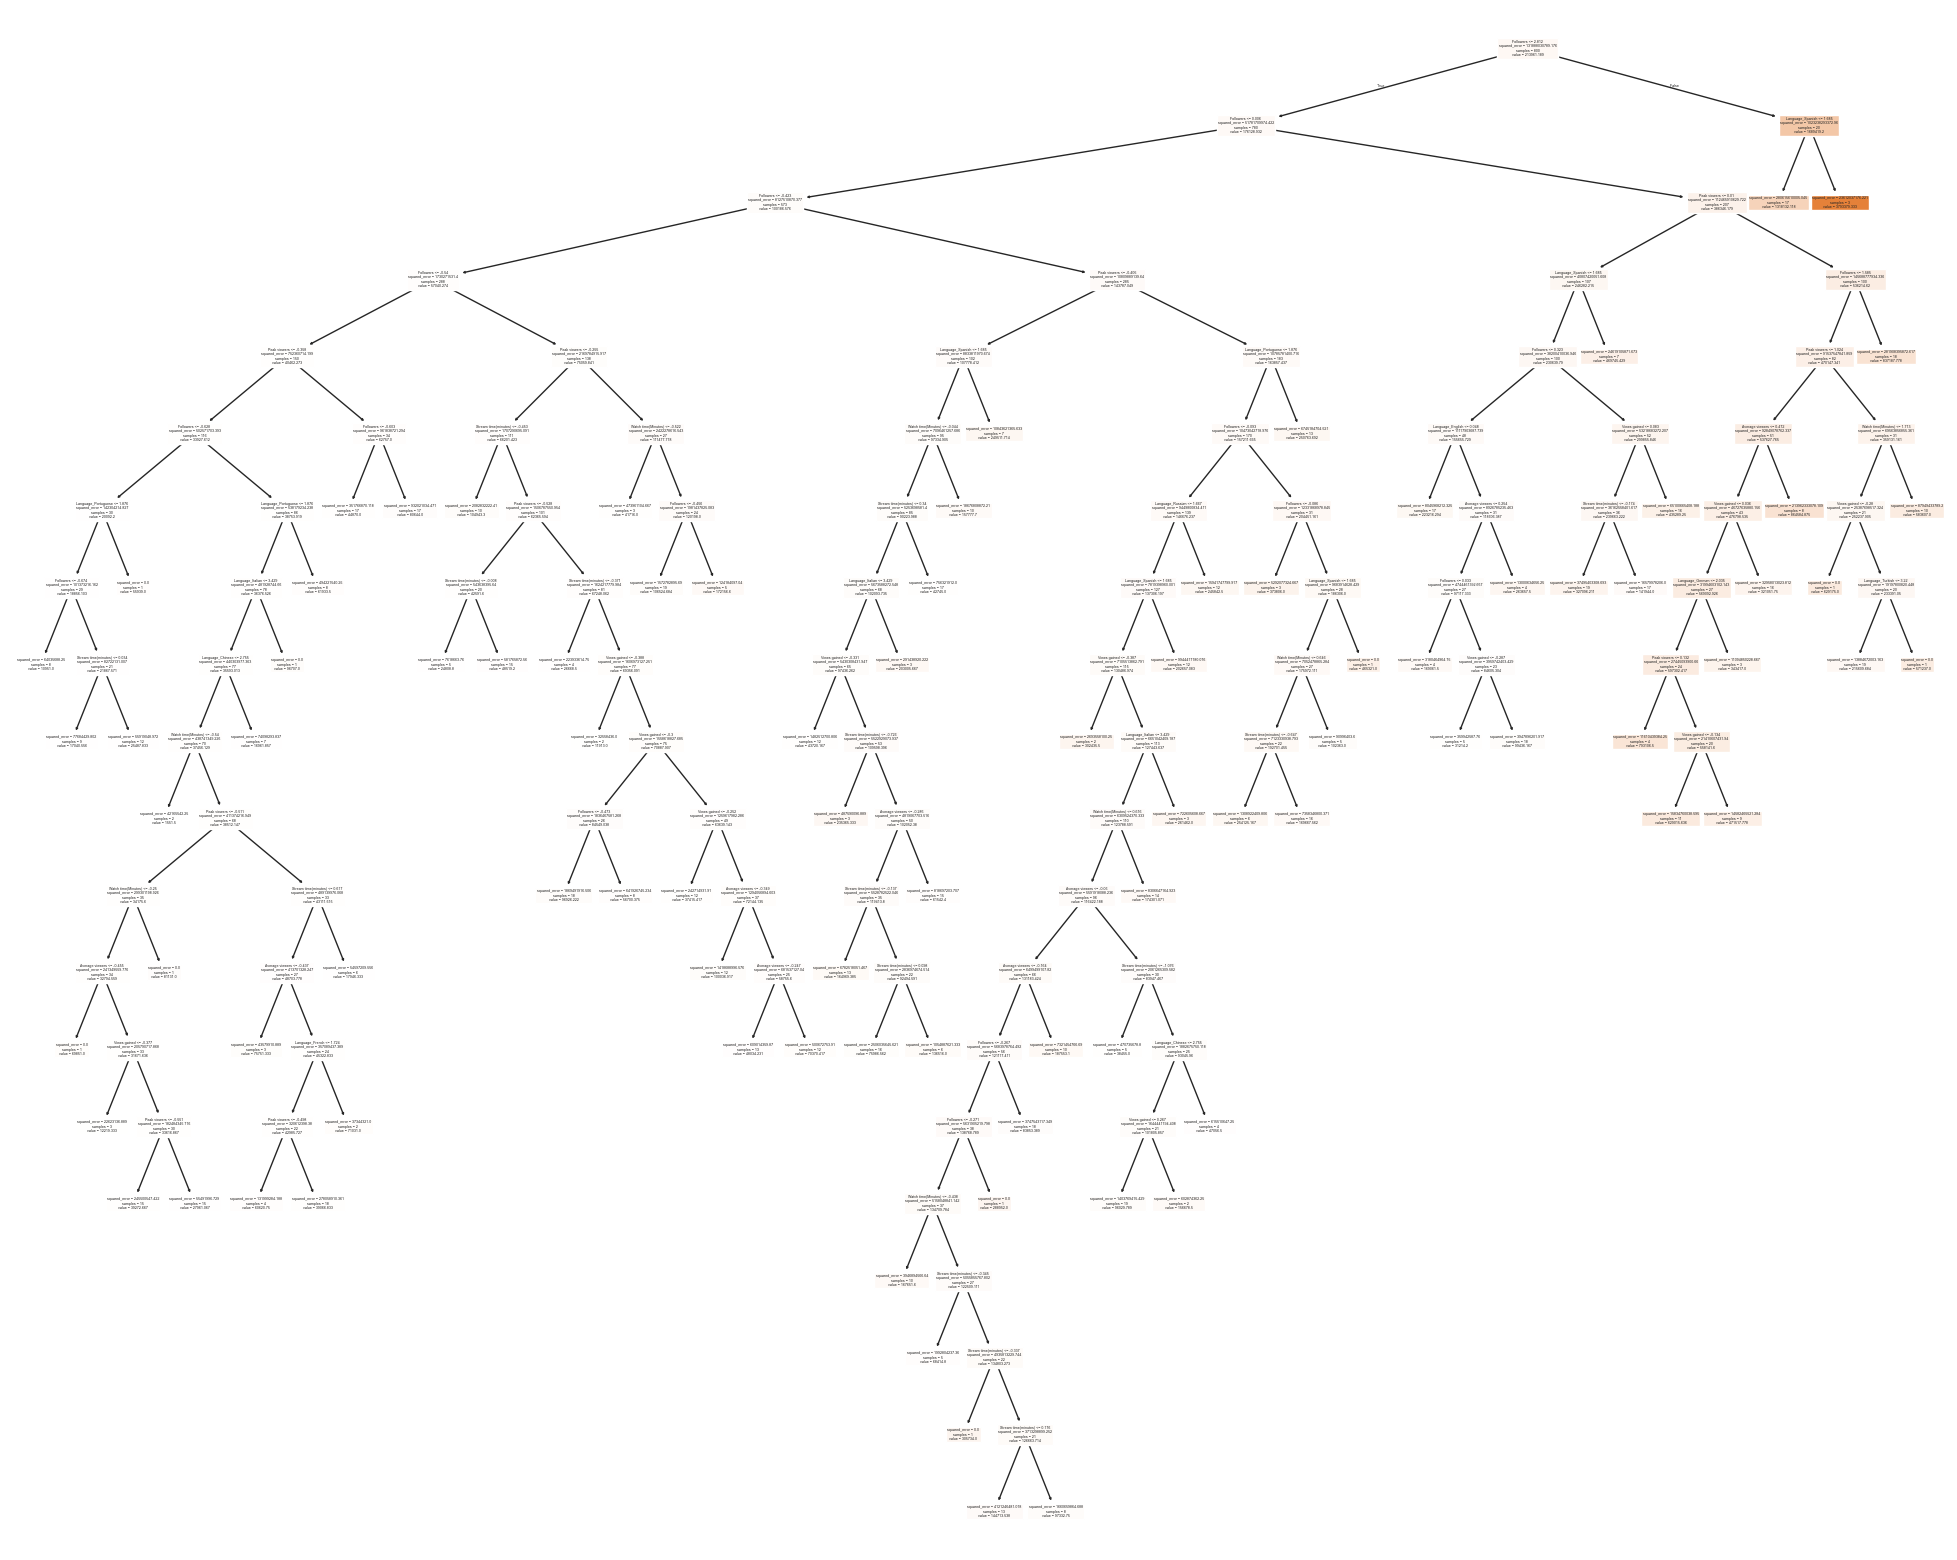

In [51]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regression, 
                   feature_names=X.columns,  
                   class_names=["SalePrice"],
                   filled=True)

### Probamos ahora, añadiendo un mínimo de muestras para un nodo terminal.

In [52]:
#Probamos dándole un mínimo de muestras para que pueda haber una división.
regression = DecisionTreeRegressor(random_state = 0, 
                                   min_samples_leaf = 30)

In [53]:
regression.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,30
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [55]:
# model evaluation for training set

y_train_predict = regression.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, y_train_predict))
mse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)


print("The model performance for Train set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = regression.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(y_test, y_test_predict))
mse = mean_squared_error(y_test, y_test_predict)
# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)


print("The model performance for Test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for Train set
--------------------------------------
RMSE is 247007.92394147252
MSE is 61012914489.87627
R2 score is 0.5373885399243996


The model performance for Test set
--------------------------------------
RMSE is 180632.7513605959
MSE is 32628190864.098854
R2 score is 0.32238141274093046


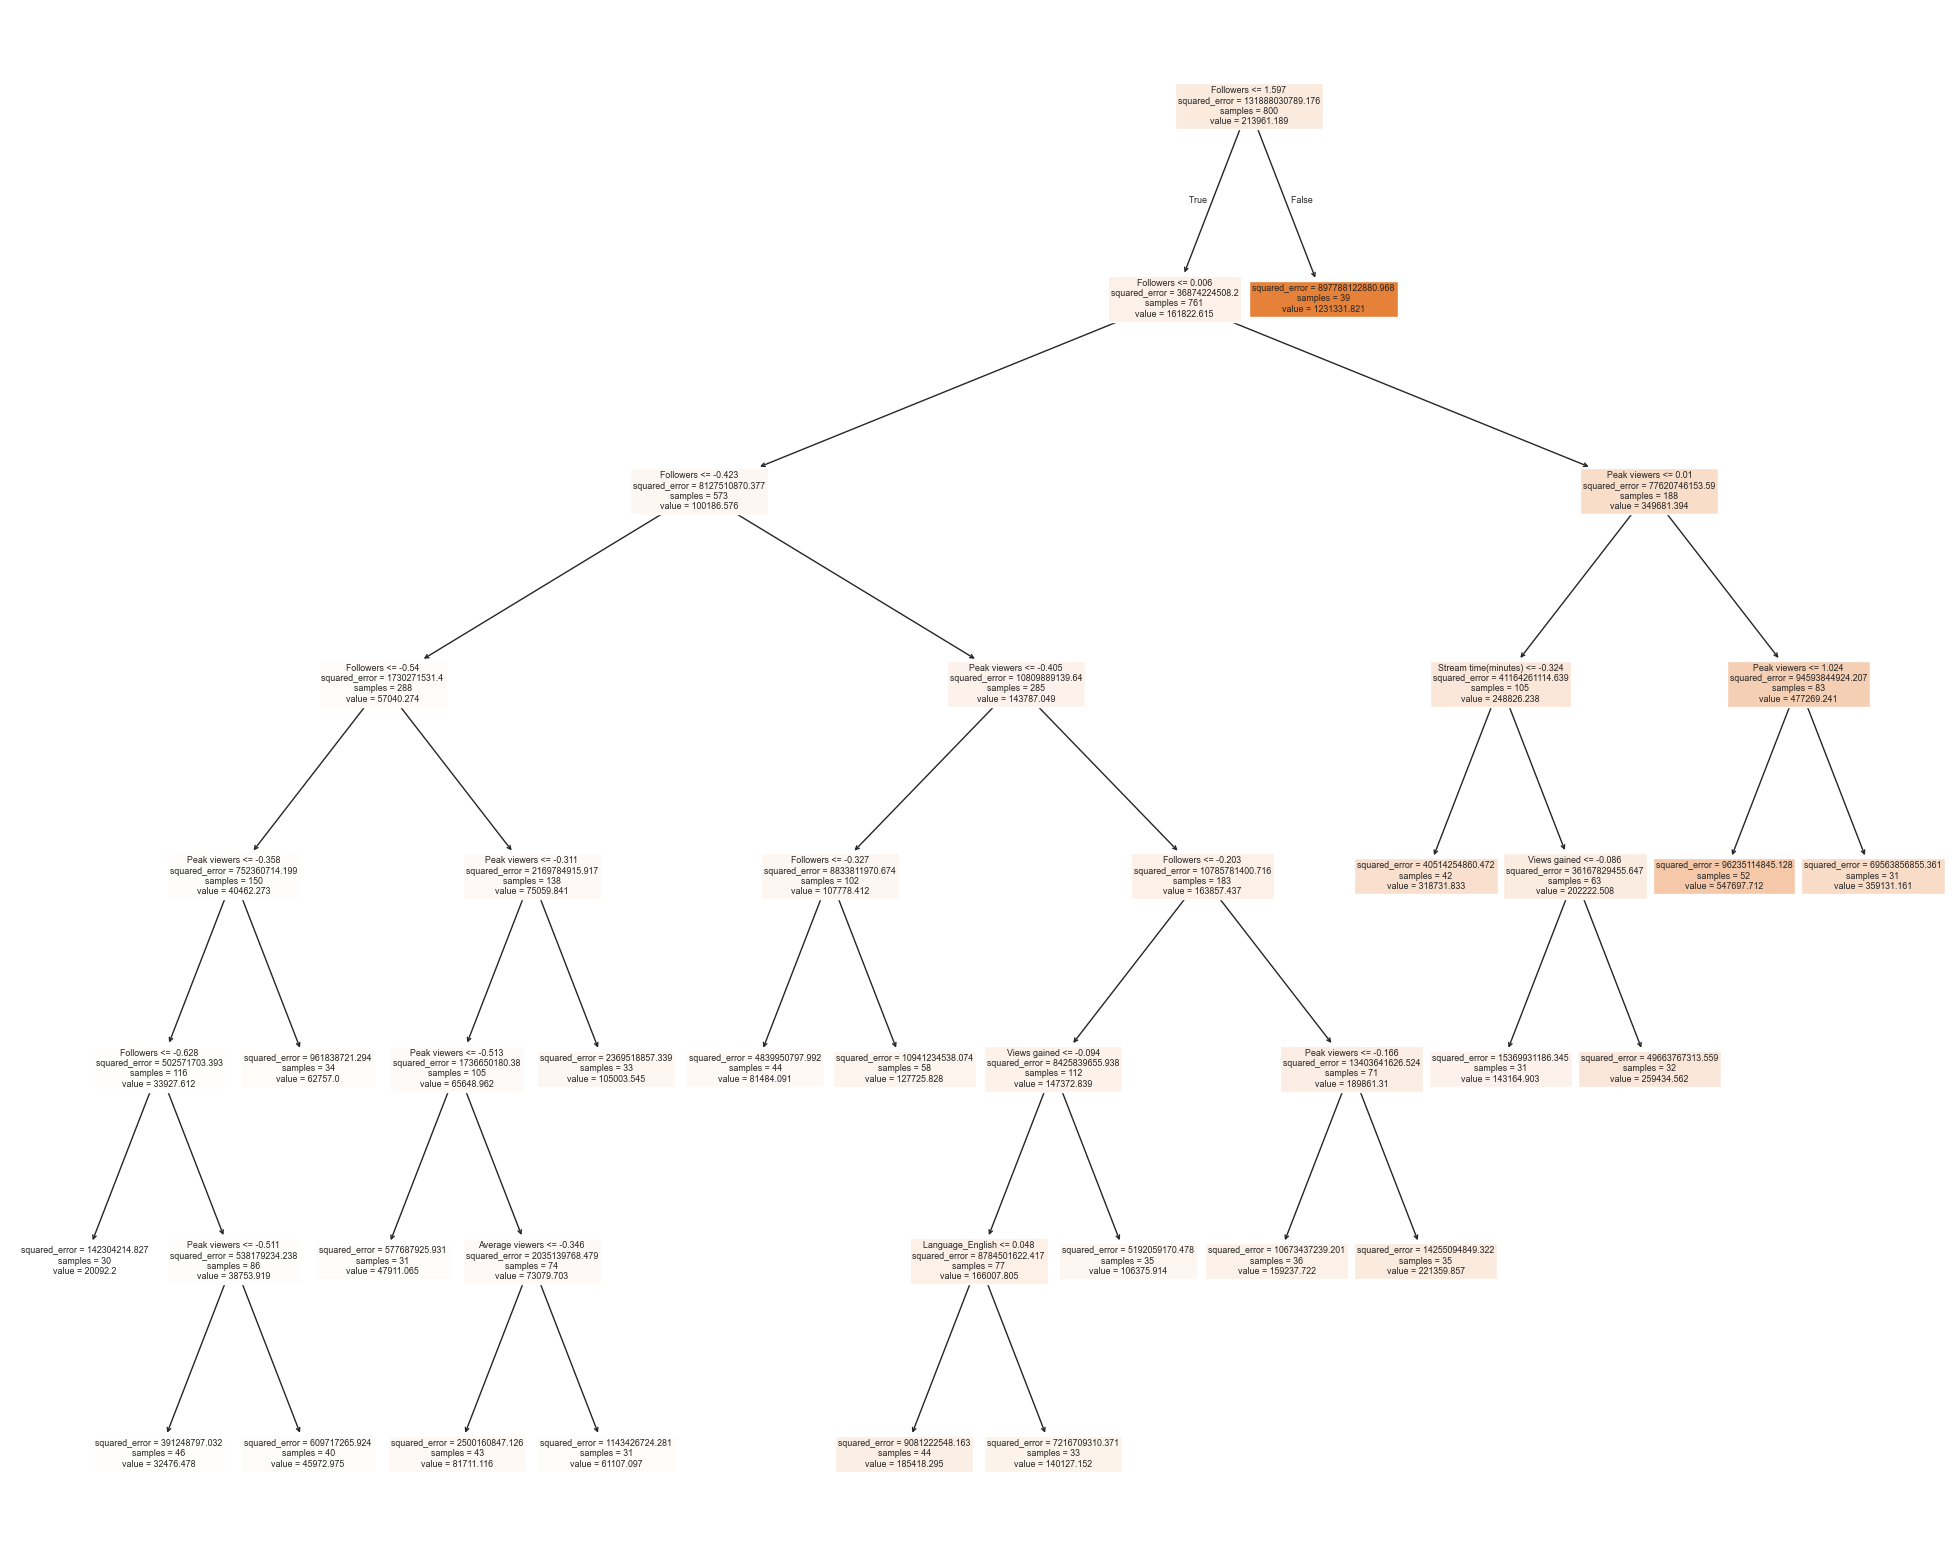

In [56]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regression, 
                   feature_names=X.columns,  
                   class_names=["SalePrice"],
                   filled=True)

### Combinamos todas las anteriores.

In [57]:
#Probamos dándole un mínimo de muestras para que pueda haber una división.
regression = DecisionTreeRegressor(random_state = 0, 
                                   min_samples_leaf = 30, 
                                   min_samples_split = 20, 
                                   max_depth = 5)

In [58]:
regression.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,20
,min_samples_leaf,30
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [63]:
# model evaluation for training set

y_train_predict = regression.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, y_train_predict))
mse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)


print("The model performance for Train set")
print("--------------------------------------")
print('RMSE is {:.2f}'.format(rmse))
print('MSE is {:.2f}'.format(mse))
print('R2 score is {:.2f}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = regression.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(y_test, y_test_predict))
mse = mean_squared_error(y_test, y_test_predict)
# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)


print("The model performance for Test set")
print("--------------------------------------")
print('RMSE is {:.2f}'.format(rmse))
print('MSE is {:.2f}'.format(mse))
print('R2 score is {:.2f}'.format(r2))

The model performance for Train set
--------------------------------------
RMSE is 247578.76
MSE is 61295243390.49
R2 score is 0.54


The model performance for Test set
--------------------------------------
RMSE is 181029.28
MSE is 32771600035.33
R2 score is 0.32


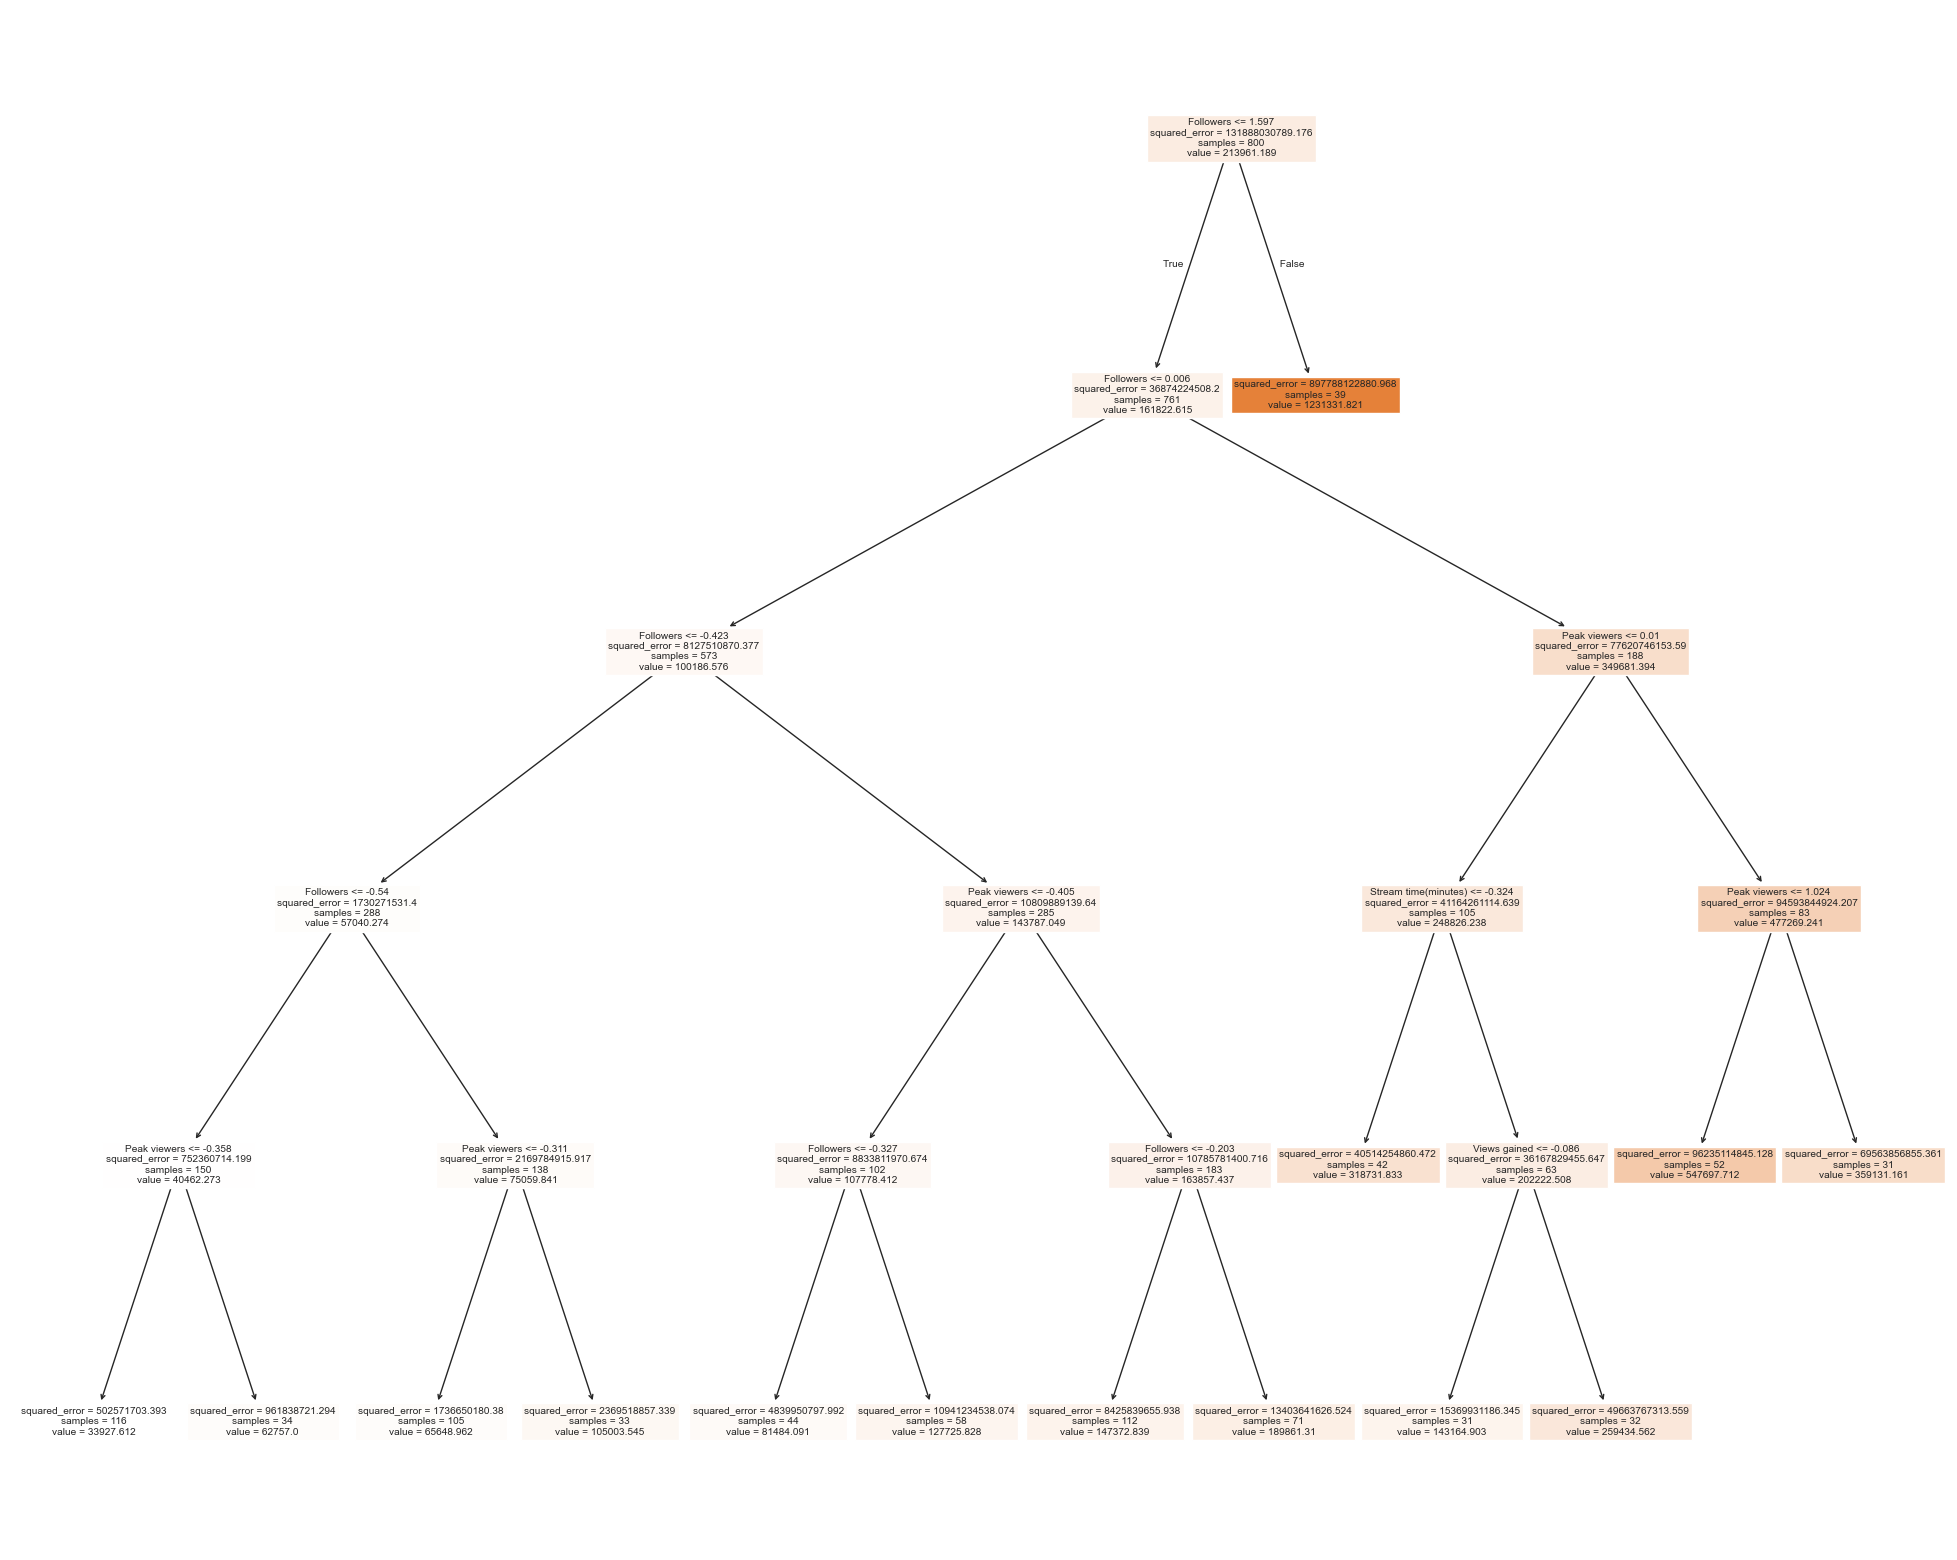

In [64]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regression, 
                   feature_names=X.columns,  
                   class_names=["SalePrice"],
                   filled=True)

### Aplicamos GridSearch()

In [66]:
#Probamos dándole un mínimo de muestras para que pueda haber una división.
regressor = DecisionTreeRegressor(random_state = 0)

In [67]:
parameters = {
                'min_samples_split': [10, 20, 40, 60, 80, 100],
                'min_samples_leaf': [5, 10, 15, 20],
                'max_depth': [4, 6, 8, 10]
            }

In [68]:
from sklearn.model_selection import GridSearchCV
grid_tree = GridSearchCV(estimator=regressor, param_grid = parameters)

In [69]:
grid_tree.fit(X_train, y_train)

,estimator,DecisionTreeR...andom_state=0)
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_leaf': [5, 10, ...], 'min_samples_split': [10, 20, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [71]:
print(" Results from Grid Search " )
print("==========================" )
print("\n The best estimator across ALL searched params:\n",grid_tree.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_tree.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_tree.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=20,
                      random_state=0)

 The best score across ALL searched params:
 0.4231855865712504

 The best parameters across ALL searched params:
 {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [74]:
# model evaluation for training set

y_train_predict = grid_tree.best_estimator_.predict(X_train)
rmse = math.sqrt(mean_squared_error(y_train, y_train_predict))
mse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {:.2f}'.format(rmse))
print('MSE is {:.2f}'.format(mse))
print('R2 score is {:.3f}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = grid_tree.best_estimator_.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(y_test, y_test_predict))
mse = mean_squared_error(y_test, y_test_predict)
r2 = r2_score(y_test, y_test_predict)


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {:.2f}'.format(rmse))
print('MSE is {:.2f}'.format(mse))
print('R2 score is {:.3f}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 202069.71
MSE is 40832166771.79
R2 score is 0.690


The model performance for testing set
--------------------------------------
RMSE is 171109.78
MSE is 29278556216.34
R2 score is 0.392


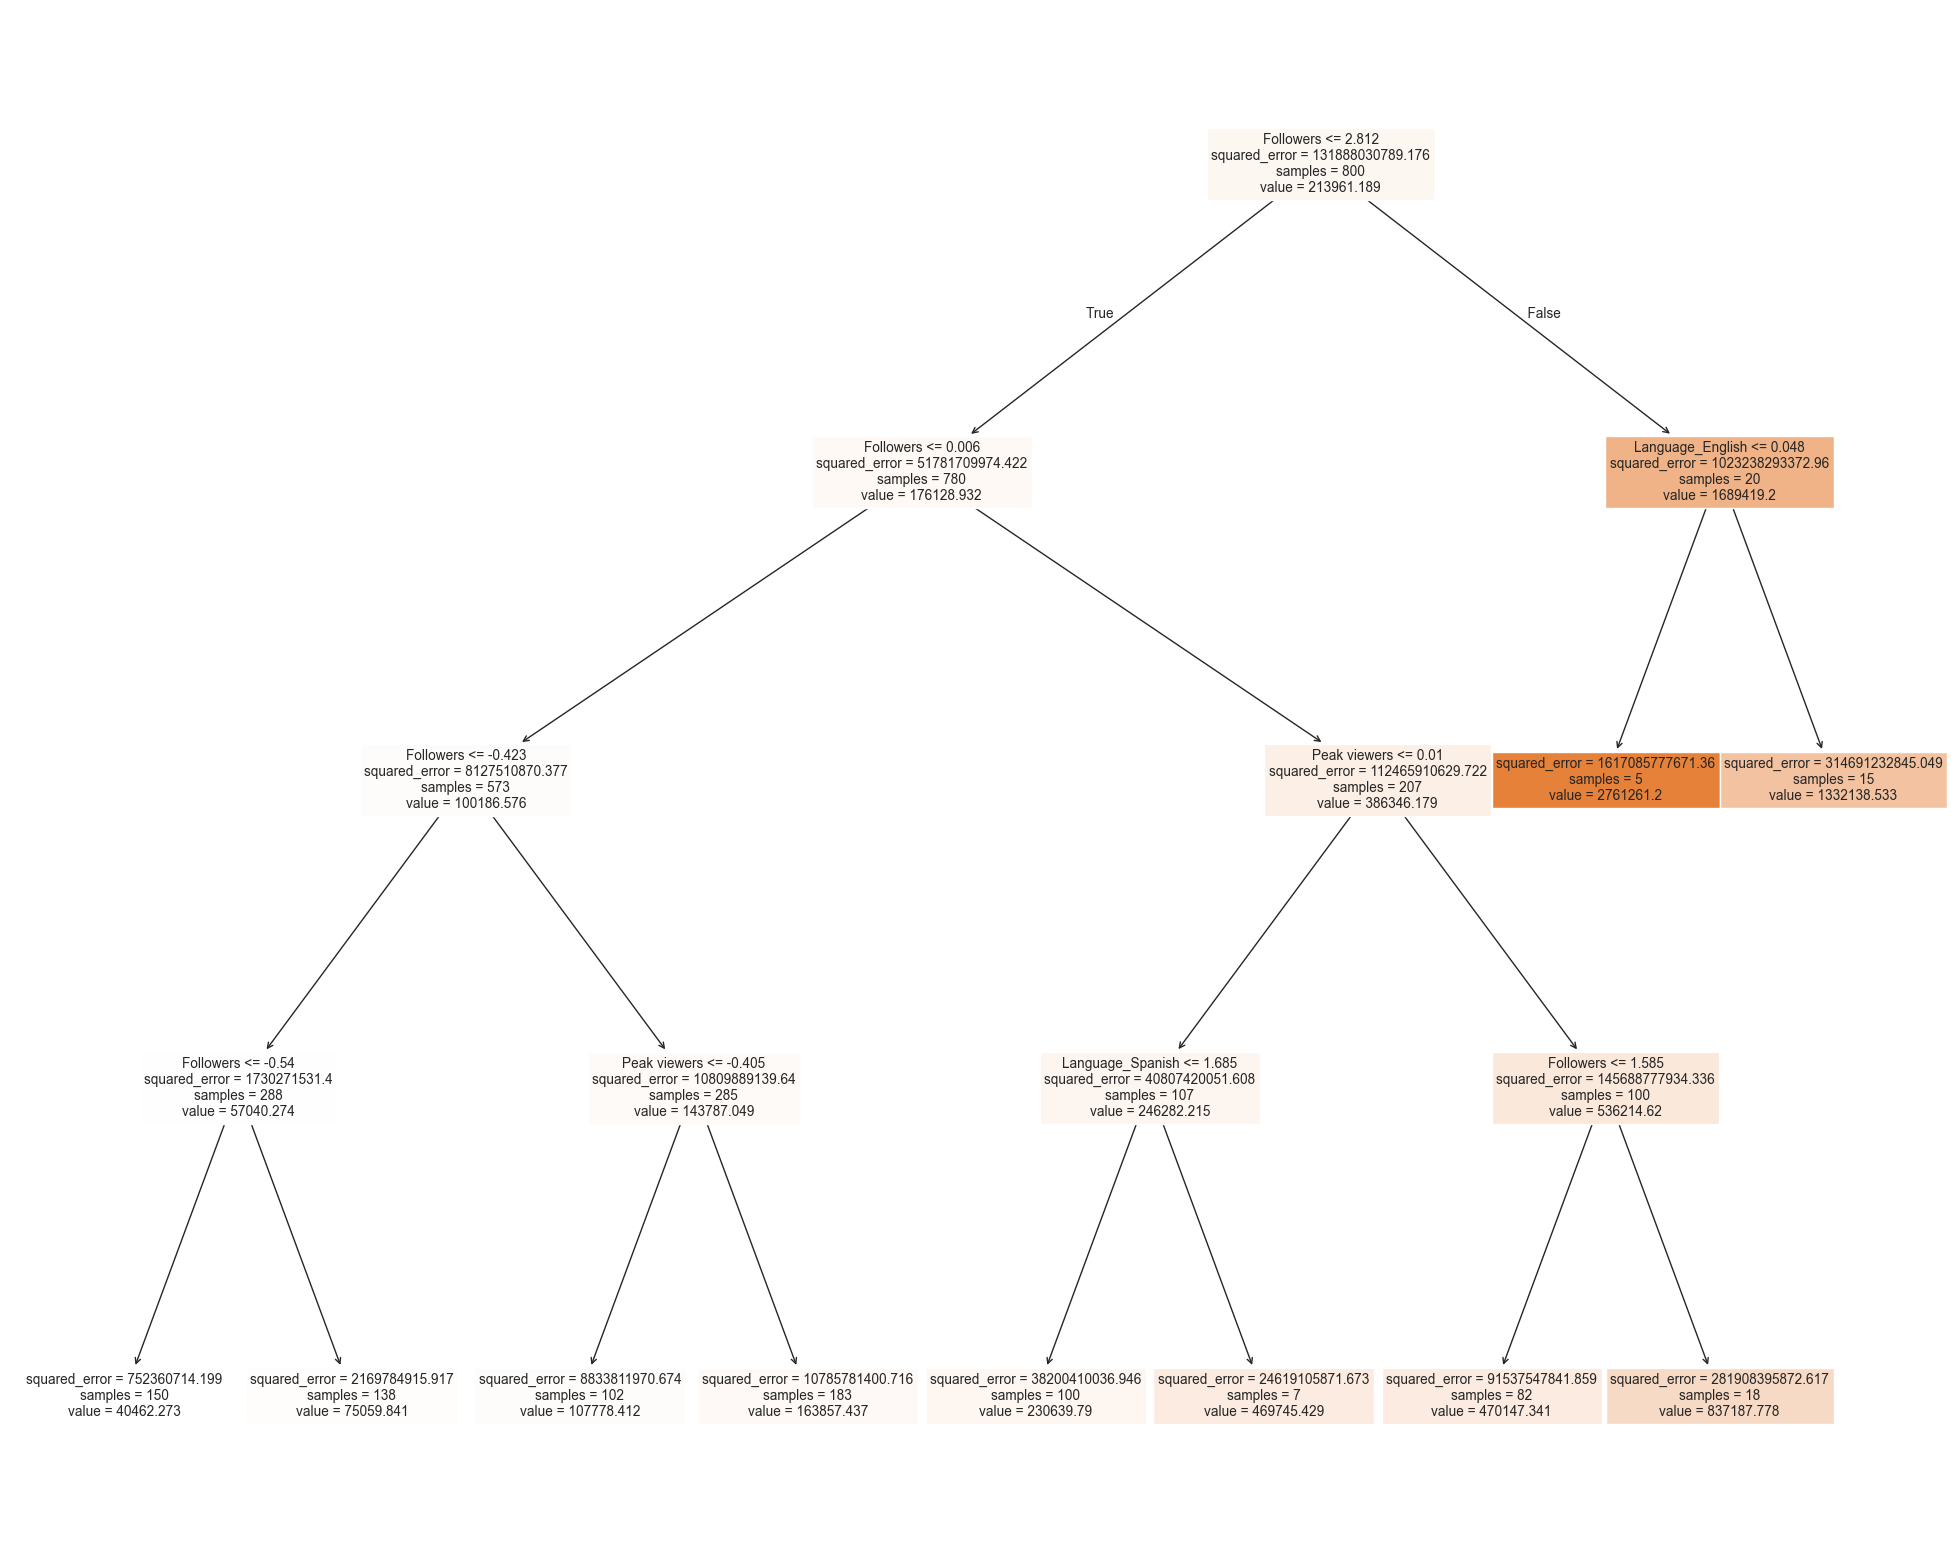

In [75]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(grid_tree.best_estimator_, 
                   feature_names=X.columns,  
                   class_names=["SalePrice"],
                   filled=True)

## Codificamos la variable categórica a valores numéricos en lugar de aplicar one hot encoding

In [77]:
dataset = pd.read_csv("../data/twitchdata-update.csv")

In [78]:
dataset.drop("Channel", axis = 1, inplace = True)

In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoding = LabelEncoder()
categories=['Partnered', 'Mature', 'Language']
dataset[categories]=dataset[categories].apply(lambda x:labelencoding.fit_transform(x))
dataset.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,3
1,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,3
2,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,14
3,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,3
4,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,3


In [80]:
X = dataset.drop("Followers gained", axis = 1)
Y = dataset['Followers gained']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 9)
(200, 9)
(800,)
(200,)


In [82]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Aplicamos GridSearch()

In [83]:
#Probamos dándole un mínimo de muestras para que pueda haber una división.
regressor = DecisionTreeRegressor(random_state = 0)

In [84]:
parameters = {
                'min_samples_split': [5, 10, 20, 40, 60, 80, 100],
                'min_samples_leaf': [2, 5, 10, 15, 20],
                'max_depth': [2, 5, 10, 15, 20]
            }

In [85]:
from sklearn.model_selection import GridSearchCV
grid_tree = GridSearchCV(estimator=regressor, param_grid = parameters)

In [86]:
grid_tree.fit(X_train, y_train)

,estimator,DecisionTreeR...andom_state=0)
,param_grid,"{'max_depth': [2, 5, ...], 'min_samples_leaf': [2, 5, ...], 'min_samples_split': [5, 10, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [87]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_tree.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_tree.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_tree.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=20,
                      random_state=0)

 The best score across ALL searched params:
 0.42209348553419623

 The best parameters across ALL searched params:
 {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [88]:
from math import sqrt
# model evaluation for training set

y_train_predict = grid_tree.best_estimator_.predict(X_train)
rmse = sqrt(mean_squared_error(y_train, y_train_predict))
mse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = grid_tree.best_estimator_.predict(X_test)
# root mean square error of the model
rmse = sqrt(mean_squared_error(y_test, y_test_predict))
mse = mean_squared_error(y_test, y_test_predict)
r2 = r2_score(y_test, y_test_predict)


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 198294.20176363993
MSE is 39320590453.07914
R2 score is 0.7018638445217709


The model performance for testing set
--------------------------------------
RMSE is 180318.65634618982
MSE is 32514817826.495304
R2 score is 0.3247359311968929


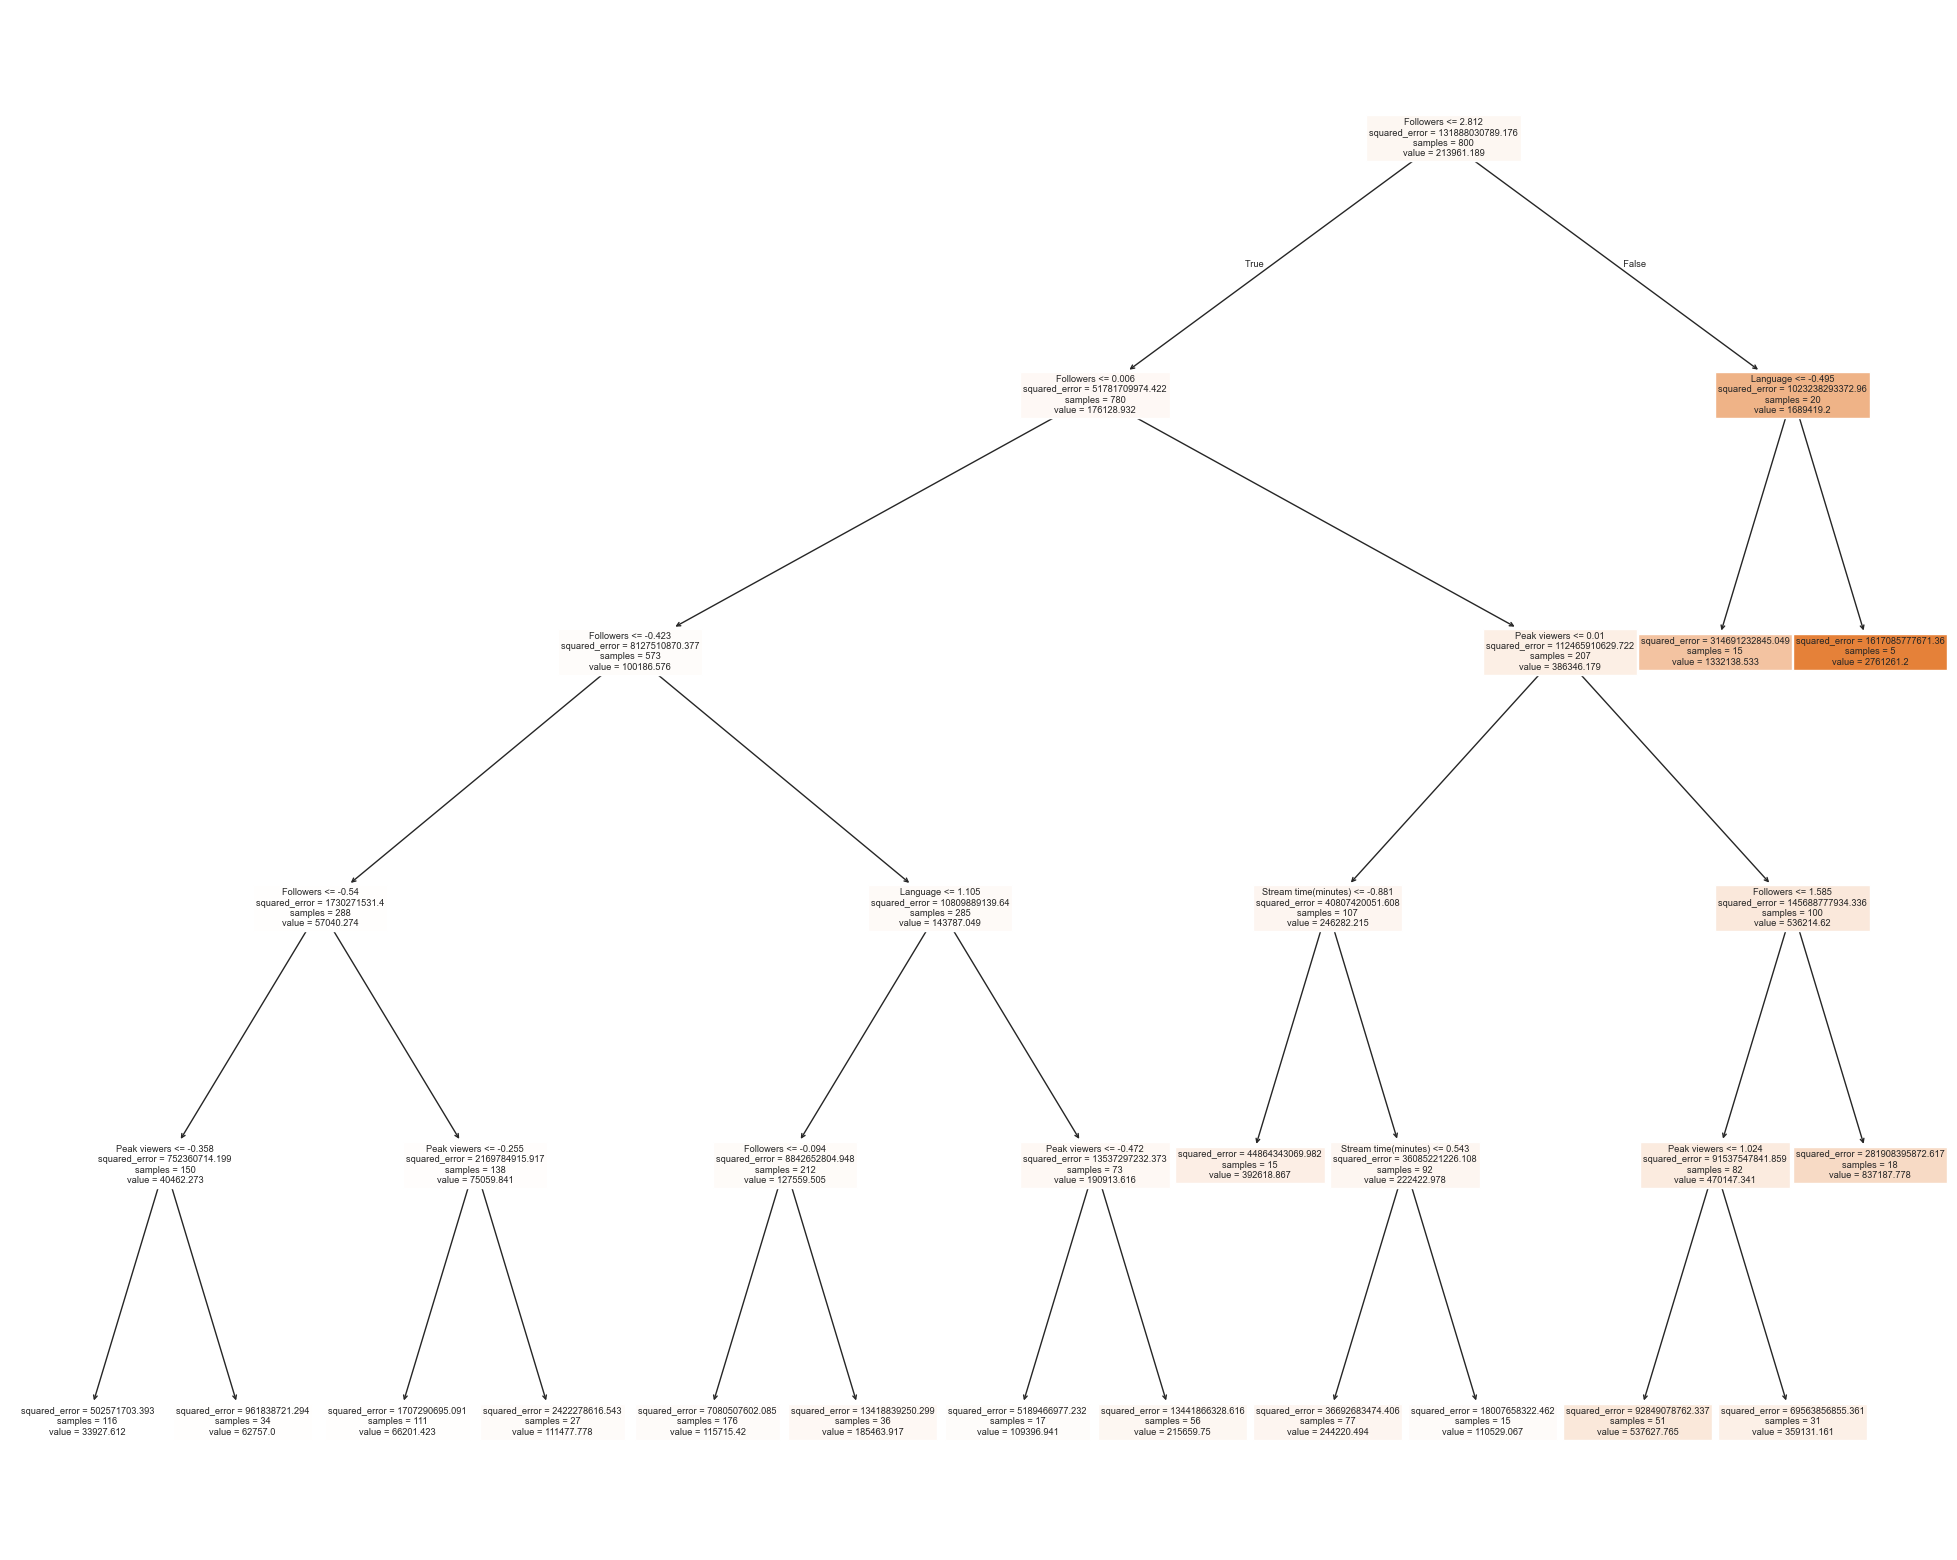

In [89]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(grid_tree.best_estimator_, 
                   feature_names=X.columns,  
                   class_names=["Followers gained"],
                   filled=True)

## Selección de variables

# Opción 1

In [90]:
dataset = pd.read_csv("../data/twitchdata-update.csv")

In [91]:
dataset.drop("Channel", axis = 1, inplace = True)

In [92]:
from sklearn.preprocessing import LabelEncoder
labelencoding = LabelEncoder()
categories=['Partnered', 'Mature', 'Language']
dataset[categories]=dataset[categories].apply(lambda x:labelencoding.fit_transform(x))
dataset.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,3
1,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,3
2,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,14
3,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,3
4,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,3


In [93]:
X = dataset.drop("Followers gained", axis = 1)
Y = dataset['Followers gained']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 9)
(200, 9)
(800,)
(200,)


In [95]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [96]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [97]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [98]:
dataset_seleccion = pd.DataFrame()
for i in range(1, len(X_train_df.columns)):
    sbs = SFS(DecisionTreeRegressor(random_state = 0, max_depth=5),k_features=i,forward=False,floating=False)
    sbs.fit(np.array(X_train), y_train)
    sbs.k_feature_names_
    regression = DecisionTreeRegressor(random_state = 0, max_depth=5)
    regression.fit(X_train_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]], y_train)
    y_pred = regression.predict(X_test_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]])
    r2 = r2_score(y_pred = y_pred, y_true = y_test)
    dataset_seleccion = pd.concat([dataset_seleccion,pd.DataFrame({"variables":[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]],"r2": r2})],ignore_index = True)


In [101]:
dataset_seleccion.sort_values(by = "r2", 
                              ascending = False, 
                              ignore_index = True)

,variables,r2
0,"[Followers, Language]",0.459414
1,"[Watch time(Minutes), Stream time(minutes), Pe...",0.363000
2,"[Watch time(Minutes), Stream time(minutes), Pe...",0.363000
3,"[Watch time(Minutes), Stream time(minutes), Fo...",0.286213
4,"[Stream time(minutes), Followers, Language]",0.257349
5,"[Stream time(minutes), Followers, Partnered, L...",0.257349
6,"[Stream time(minutes), Followers, Partnered, M...",0.257349
7,[Followers],-0.781594


In [102]:
X = dataset[dataset_seleccion.sort_values(by = "r2", 
                                          ascending = False, 
                                          ignore_index = True)["variables"][0]]

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [104]:
lin_model = DecisionTreeRegressor(random_state = 0, max_depth=5)
lin_model.fit(X_train, Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [105]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 161159.57851814205
R2 score is 0.8030722758332607


The model performance for testing set
--------------------------------------
RMSE is 161337.83224209936
R2 score is 0.45941405382318257


### Aplicamos GridSearch() con las dos variables seleccionadas

In [106]:
X = dataset[dataset_seleccion.sort_values(by = "r2", ascending = False, ignore_index = True)["variables"][0]]

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [108]:
#Probamos dándole un mínimo de muestras para que pueda haber una división.
regressor = DecisionTreeRegressor(random_state = 0)

In [110]:
parameters = { 'max_depth': [2, 5, 10, 15, 20] }

In [117]:
from sklearn.model_selection import GridSearchCV
grid_tree = GridSearchCV(estimator=regressor, 
                         param_grid = parameters)

In [118]:
grid_tree.fit(X_train, y_train)

,estimator,DecisionTreeR...andom_state=0)
,param_grid,"{'max_depth': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [120]:
print(" Results from Grid Search " )
print("==========================" )
print("\n The best estimator across ALL searched params:\n",grid_tree.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_tree.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_tree.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=5, random_state=0)

 The best score across ALL searched params:
 0.4617966545173863

 The best parameters across ALL searched params:
 {'max_depth': 5}


In [123]:
# model evaluation for training set

y_train_predict = grid_tree.best_estimator_.predict(X_train)
rmse = sqrt(mean_squared_error(y_train, y_train_predict))
mse = mean_squared_error(y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = grid_tree.best_estimator_.predict(X_test)
# root mean square error of the model
rmse = sqrt(mean_squared_error(y_test, y_test_predict))
mse = mean_squared_error(y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 161159.57851814205
MSE is 25972409748.145195
R2 score is 0.8030722758332607


The model performance for testing set
--------------------------------------
RMSE is 161337.83224209936
MSE is 26029896112.579796
R2 score is 0.45941405382318257


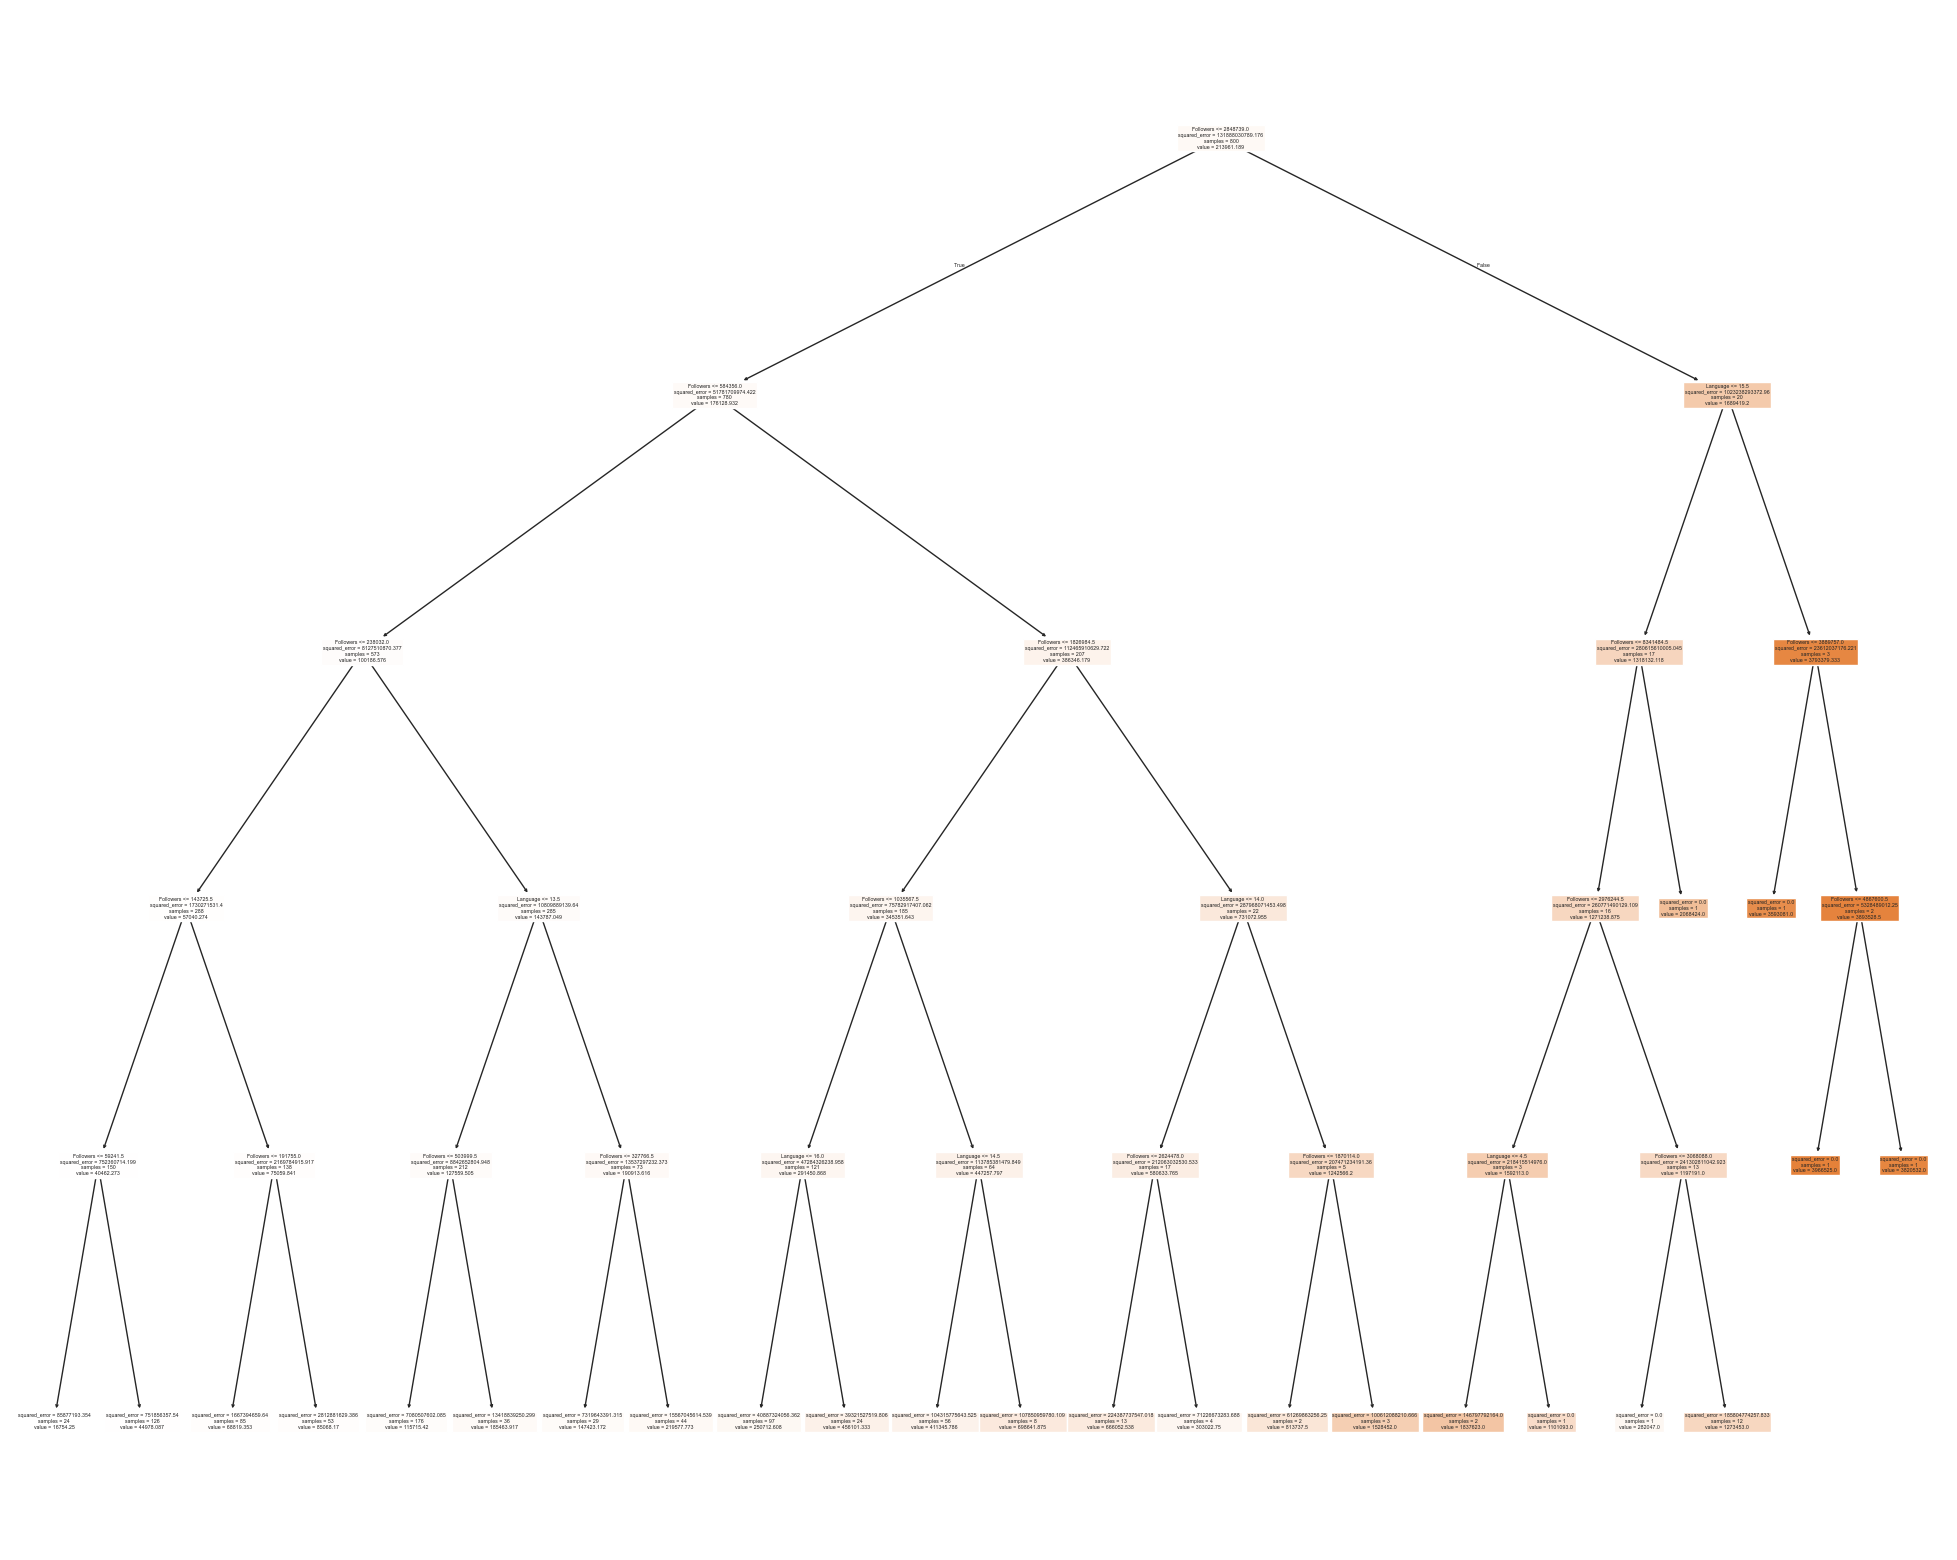

In [124]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(grid_tree.best_estimator_, 
                   feature_names=X.columns,  
                   class_names=["Followers gained"],
                   filled=True)